In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


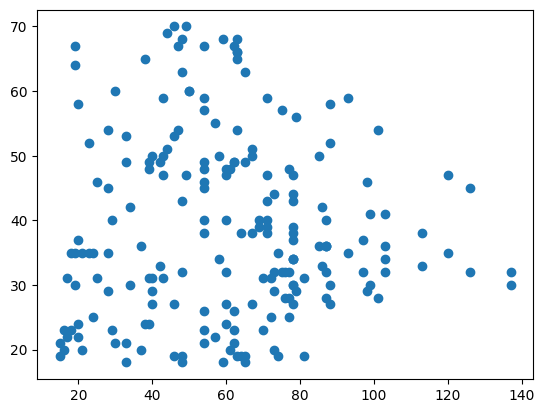

In [5]:
plt.scatter(df['Annual Income (k$)'],df['Age'])

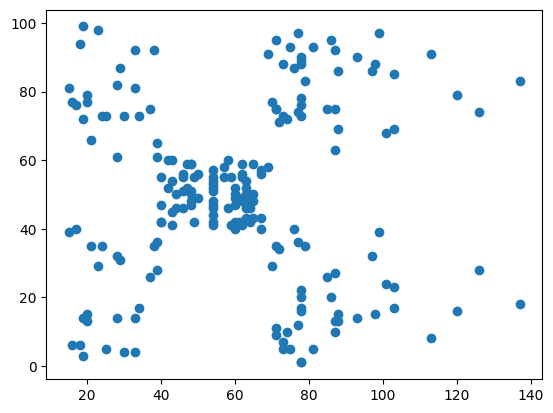

In [7]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [8]:
X = df[["Spending Score (1-100)","Annual Income (k$)","Age"]]

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2,random_state=42)

In [16]:
pca_x = pca.fit_transform(X)

In [21]:
k_mean = KMeans(n_clusters=5,random_state=42)

In [22]:
cluster = k_mean.fit_predict(pca_x)

In [23]:
df["Cluster"] = cluster

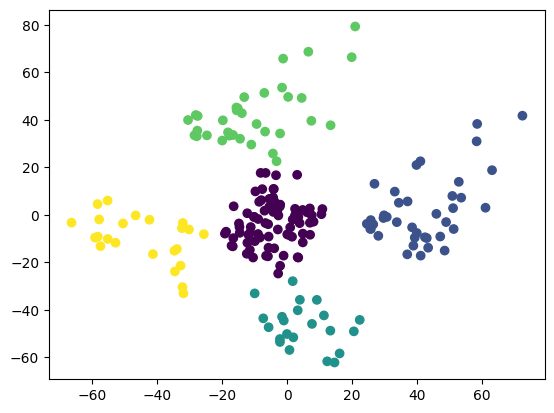

In [24]:
plt.scatter(pca_x[:,0],pca_x[:,1],c=df["Cluster"])

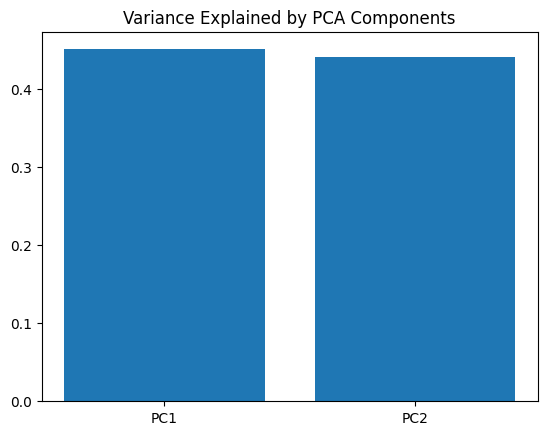

In [26]:
plt.bar(['PC1','PC2'], pca.explained_variance_ratio_)
plt.title("Variance Explained by PCA Components")
plt.show()


In [27]:
print(df.groupby("Cluster")[['Age','Annual Income (k$)','Spending Score (1-100)']].mean())

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.475610           55.475610               49.268293
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.647059           88.735294               16.764706
4        45.217391           26.304348               20.913043
